# DG tutorial

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl

We will consider solving a conservation law without sources,
$$
\frac{\partial q}{\partial t} + \frac{\partial f(q)}{\partial x} = 0.
$$
We multiply through by a smooth, compactly supported test function $\phi(x)$ and integrate over an element to get
$$
\int_k \frac{\partial q}{\partial t} \phi \, dx + \big[ f(q) \phi \big]^{x_R}_{x_L} - \int_k f(q) \frac{\partial \phi}{\partial x} \, dx = 0.
$$

We now define our approximate solution to be in some vector space $V$ equipped with a complete set of orthogonal basis functions $\psi_i$:
$$
\tilde{q}(t, x) = \sum_i^M a_i(t) \, \psi_i(x).
$$
If our vector space is complete, in the limit $M \to \infty$ we recover the exact solution $\tilde{q}(x) \to q(x)$.

Note that the weak solution of the PDE is one that satisfies the equation above _for all smooth, compactly supported $\phi$_.  In order to test all $\phi$, we'll take $\phi_j$ to be the orthogonal basis functions of the vector space $V$ we considered earlier.  Since it'd be impossible to test an infinite number of basis functions, we'll instead only consider the first $N$ basis functions.

The discretization is then
$$
\int_k \frac{\partial \tilde{q}}{\partial t} \phi_j \, dx + \big[ f(\tilde{q}) \phi_j \big]^{x_R}_{x_L} - \int_k f(\tilde{q}) \frac{\partial \phi_j}{\partial x} \, dx = 0, ~~~ \forall~j \leq N.
$$
We will write the first term (called the _mass matrix_) as (cf. T 2.12)
$$
\int_k \frac{\partial \tilde{q}}{\partial t} \phi_j \, dx = \sum_{i=0}^{M} \frac{d a_i(t)}{d t} \int_k \psi_i(x) \phi_j(x) \, dx \equiv \Big[ \mathbf{M} \cdot \frac{d \mathbf{a}}{d t} \Big]_j
$$
where we've inserted our approximation for $\tilde{q}$.  Notice that since $\psi_i, \phi_j$ are both orthogonal basis functions from the same family, we can compute these integrals analytically.

The other term with an integral is called the _stiffness matrix_, which is
$$
\int_k f(\tilde{q}) \frac{\partial \phi_j}{\partial x} \, dx = \int_k c \tilde{q} \frac{\partial \phi_j}{\partial x} \, dx = c \sum_{i=0}^M a_i(t) \int_k \psi_i \partial_x \phi_j \, dx \equiv c \Big[\mathbf{a} \cdot \mathbf{K} \Big]_j
$$
where once again we can compute the integrals analytically.

Finally we need to compute the flux term, which is simple thanks to our simple upwind flux function:
$$
\big[ f(\tilde{q}) \phi \big]^{x_R}_{x_L} = c \tilde{q}_k (x_R) \phi_j(x_R) - c \tilde{q}_{k-1}(x_R) \phi_j(x_L) \equiv \hat{\mathbf{f}}.
$$

Hence our discretized equation can be written
$$
0 = \mathbf{M} \cdot \partial_t \mathbf{a} + \hat{\mathbf{f}} - c \mathbf{K} \cdot \mathbf{a}
$$
which can be solved for $\partial_t \mathbf{a}$ to yield
$$
\partial_t \mathbf{a} = \mathbf{M}^{-1} \cdot \big[ c \mathbf{K} \cdot \mathbf{a} - \hat{\mathbf{f}} \big].
$$

**TODO: work out case where the flux isn't linear**

We will take $\psi_i = L_i$, where $L_i$ are the Lagrange polynomials and we choose our nodal points to be the roots of the Legendre polynomials.



Below we will do the simplified case, where
$$
\partial_t \mathbf{a} = \mathbf{M}^{-1} \cdot (\mathbf{f} - c \mathbf{K} \cdot \mathbf{a}),
$$
where
$$
M^{-1} = 
\begin{pmatrix}
4 & -2 \\
-2 & 4
\end{pmatrix},
$$
and
$$
\mathbf{f} = c
\begin{pmatrix}
-q_{k-1}(x_R) \\
q_k (x_R)
\end{pmatrix},
$$
and
$$
K = \frac{1}{2}
\begin{pmatrix}
-1 & 1 \\
-1 & 1
\end{pmatrix}.
$$

**TODO: work out explicit forward-Euler update**

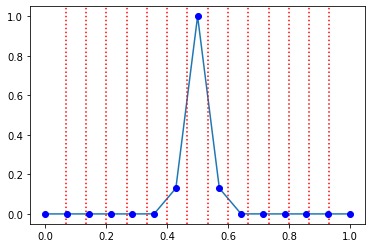

In [50]:
#define dt
dt = 0.0001

#define number of elements
numElem = 15

#define initial data
xMin = 0.
xMax = 1.
x    = np.linspace(xMax, xMin, numElem)

#define element boundaries, which lie at i*dxElem for i in 1, numElem
dxElem = (xMax-xMin)/numElem

sigma = 0.05
mu    = 0.5
q     = np.exp(-(x-mu)**2./sigma**2.)
qp    = -2./sigma**2.*(x-mu)*np.exp(-(x-mu)**2./sigma**2.)
#project initial data onto basis: 
a0 = q - qp*x
a1 = q + qp*(1-x)



pl.plot(x, q)
for n in range(1, numElem):
    pl.axvline(dxElem*n, c='r', ls=':')


psi0 = 1-x
psi1 = x
pl.plot(x, a0*psi0+a1*psi1, 'bo')
pl.show()

In [52]:
#define c = 1
c = 1

#define matrices
Minv = [[4,-2],[-2,4]]
K    = [[-1/2, 1/2], [-1/2, 1/2]]

#set a0n, a1n = a0, a1
a0n = a0
a1n = a1

